In [1]:
from master import *

Using TensorFlow backend.
/home/sambt/.conda/envs/sambt-uproot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sambt/.conda/envs/sambt-uproot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sambt/.conda/envs/sambt-uproot/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sambt/.c

In [10]:
fq1 = prefix+'H2gg-CF3.0CA3.0-sqg0100/total.root'
fq2 = prefix+'H2gg-CF3.0CA3.0-sqg0100-esg0011/total.root'
X,Y = tools.pre_process(fq1,fq2,nev_max=50000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = np.array([np.sum([1 if zi > 0 else 0 for zi in jet]) for jet in z])
optimal = an.nk(z,1) + an.nk(z,2)

Finished preprocessing at 40.739768743515015


In [11]:
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)
efn, efn_roc, efn_auc = tools.train_qg_efn(X,Y,n_epoch=3,summary=False)

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 4s 52us/step - loss: 0.6291 - acc: 0.6964 - val_loss: 0.5359 - val_acc: 0.7337
Epoch 2/3
70000/70000 [==============================] - 2s 29us/step - loss: 0.5500 - acc: 0.7228 - val_loss: 0.5346 - val_acc: 0.7326
Epoch 3/3
70000/70000 [==============================] - 2s 29us/step - loss: 0.5465 - acc: 0.7245 - val_loss: 0.5363 - val_acc: 0.7323
Finished training at 9.45159101486206

PFN AUC: 0.7982204720466783

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 4s 53us/step - loss: 0.6011 - acc: 0.6784 - val_loss: 0.5628 - val_acc: 0.7078
Epoch 2/3
70000/70000 [==============================] - 2s 29us/step - loss: 0.5688 - acc: 0.7047 - val_loss: 0.5612 - val_acc: 0.7103
Epoch 3/3
70000/70000 [==============================] - 2s 28us/step - loss: 0.5685 - acc: 0.7053 - val_loss: 0.5685 - va

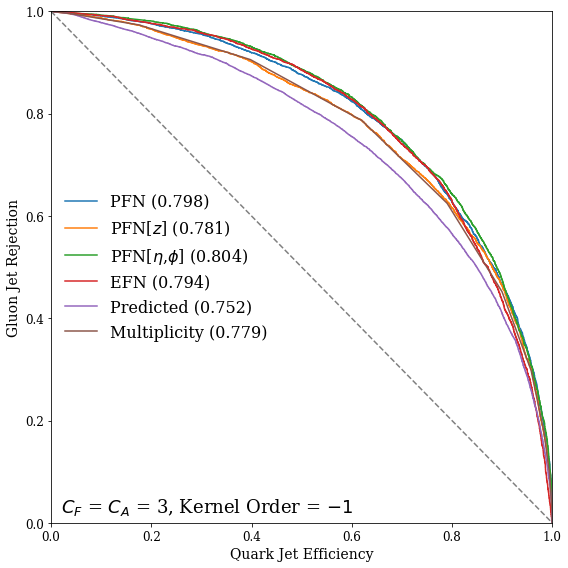

In [12]:
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mult_roc = roc_curve(Y[:,1],-mults)
mult_auc = roc_auc_score(Y[:,1],-mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,efn_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,efn_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","EFN","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)

In [9]:
np.array(mults)

array([2, 4, 5, ..., 8, 5, 4])